In [106]:
import numpy as np
import matplotlib.pyplot as plt

# sklearn.datasets

## fetch_openml

In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

C:\Users\jongm\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [5]:
mnist['data']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
mnist['target']

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

# sklearn.linear_model

## SGDClassifier

In [11]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

C:\Users\jongm\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
X_pred = sgd_clf.predict(X_test)

In [13]:
a, b = np.unique(X_pred == y_test, return_counts=True)
a, b

(array([False,  True]), array([ 2918, 20182], dtype=int64))

<img src='lib_img/decision_vs_loss.png' align='left'>

In [59]:
y_train[1]

'2'

In [60]:
sgd_clf.decision_function(X_train[1:2])

array([[-24158.64622037,  -5871.19146335,   4714.21997329,
         -4800.69945703, -34769.71660658, -10949.84899307,
        -23234.23749281, -63808.22030668,  -4992.87786931,
        -30475.36003229]])

# sklearn.model_selection

## train_test_split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist['data'], mnist['target'], test_size=0.33, random_state=42)

## StratifiedKFold

In [8]:
from sklearn.model_selection import StratifiedKFold

In [9]:
skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

In [10]:
for X_idx, y_idx in skfolds.split(X_train, y_train):
    print(len(X_idx), len(y_idx))
len(X_train), len(y_train)

31266 15634
31267 15633
31267 15633


(46900, 46900)

## cross_val_score

In [20]:
from sklearn.model_selection import cross_val_score

In [22]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87757452, 0.8720655 , 0.85767287])

## cross_val_predict

In [29]:
from sklearn.model_selection import cross_val_predict

In [30]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

# sklearn.metrics

## confusion_matrix

In [31]:
from sklearn.metrics import confusion_matrix

In [35]:
set(y_train)

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}

In [32]:
confusion_matrix(y_train, y_train_pred) #row vs column

array([[4341,    0,   42,   25,   10,   61,   25,    5,  117,   10],
       [   4, 5112,   39,    8,    9,   19,    6,   11,   57,    9],
       [  37,   67, 4014,   71,   58,   23,   71,   59,  225,   15],
       [  31,   22,  165, 3929,   14,  197,   14,   57,  277,   52],
       [   8,   23,   38,    7, 4180,   15,   38,   32,  141,  198],
       [  60,   23,   39,  131,   75, 3359,   81,   38,  330,   70],
       [  34,   32,   60,   11,   27,  120, 4218,    5,   73,    2],
       [  14,   35,   83,   41,   50,   17,    3, 4263,  100,  232],
       [  40,  112,   98,   89,   31,  222,   23,   31, 3916,   67],
       [  17,   38,   24,   52,  342,   81,    1,  347,  326, 3429]],
      dtype=int64)

## precision_score, recall_score

In [36]:
from sklearn.metrics import precision_score, recall_score

precision = TP / (TP + FP)<br>
recall = TP / (TP + FN)

In [40]:
precision_score(y_train, y_train_pred, average=None)

array([0.94657654, 0.93557833, 0.87222947, 0.90032081, 0.87155963,
       0.81648031, 0.94151786, 0.87933168, 0.70406329, 0.83961802])

In [41]:
recall_score(y_train, y_train_pred, average=None)

array([0.93636756, 0.96928328, 0.86508621, 0.82576713, 0.89316239,
       0.79862102, 0.92055871, 0.88114924, 0.84597105, 0.73631093])

## f1_score

In [42]:
from sklearn.metrics import f1_score

In [44]:
f1_score(y_train, y_train_pred, average=None)

array([0.94144437, 0.95213261, 0.86864315, 0.8614339 , 0.88222879,
       0.80745192, 0.93092033, 0.88023952, 0.76852124, 0.78457842])

## precision_recall_curve

Binary classification only

In [61]:
from sklearn.metrics import precision_recall_curve

In [94]:
y_train_3 = y_train == '3'

In [99]:
sgd_clf_3 = SGDClassifier(random_state=42)
sgd_clf_3.fit(X_train, y_train_3)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [100]:
y_pred = cross_val_predict(sgd_clf_3, X_train, y_train_3, cv=3,
                          method='decision_function')

In [104]:
precisions, recalls, thresholds = precision_recall_curve(y_train_3, y_pred)

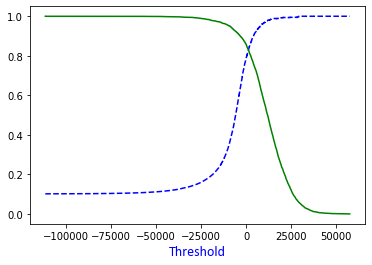

In [117]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    
    font = {'family': 'calibri',
        'color':  'blue',
        'weight': 'normal',
        'size': 14,
        }
    
    plt.xlabel('Threshold', fontdict=font)
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

# sklearn.base

## clone

In [14]:
from sklearn.base import clone

In [15]:
sgd_clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [16]:
clone_clf = clone(sgd_clf)
clone_clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:
clone2_clf = sgd_clf
id(clone2_clf), id(sgd_clf), id(clone_clf)

(1307813979416, 1307813979416, 1305671567512)

## BaseEstimator

In [18]:
from sklearn.base import BaseEstimator

In [26]:
class ZeroClassifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [27]:
zero_clf = ZeroClassifier()
cross_val_score(zero_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0., 0., 0.])